In [175]:
import chipwhisperer as cw
import matplotlib.pyplot as plt
import numpy as np
import struct
import time
from decimal import Decimal

In [105]:
def float_to_binary_str(f):
    # Pack the float into 4 bytes (32-bit) using IEEE 754 standard
    [packed] = struct.unpack('!I', struct.pack('!f', f))
    # Convert the packed number to a binary string
    return f"{packed:032b}"

In [106]:
def HW_float32(f):
    # Get the binary representation of the 32-bit float
    binary_str = float_to_binary_str(f)
    # Count and return the number of '1' bits
    return binary_str.count('1')

In [107]:
print(float_to_binary_str(0.657))
print(HW_float32(0.657))

00111111001010000011000100100111
15


In [131]:
proj = cw.open_project('project-04')

In [132]:
trace_waves_arr = []
inputs_arr = []
for trace in proj.traces:
    trace_waves_arr.append(trace.wave)
    inputs_arr.append(trace.textin)
print(len(trace_waves_arr))
print(len(inputs_arr))

1000
1000


In [134]:
def CPA_attack(trace_waves, inputs, weights, time_sample_index):
    r_abs = []
    n_trace_waves = len(trace_waves)
    leakage_sum = 0
    for trace_wave in trace_waves:
        leakage_sum += trace_wave[time_sample_index]    
    average_leakage = leakage_sum / n_trace_waves
    M = len(inputs)
    N = len(weights)
    
    
    for i in range(N):
        hypothetical_products = []
        hypothetical_leakages = []
        hypothetical_leakage_sum = 0
        for j in range(M):
            hypothetical_product = weights[i] * inputs[j]
            hypothetical_products.append(hypothetical_product)
            #print(type(hypothetical_product))
            #print(type(weights[i]))
            #print(type(inputs[j]))
            #print(inputs[j])
            hypothetical_leakage = HW_float32(hypothetical_product)
            hypothetical_leakages.append(hypothetical_leakage)
            hypothetical_leakage_sum += hypothetical_leakage
            #print(f'Input {inputs[j]} with idx {j}, weight {weights[i]} with idx {i} -> hypothetical_product = {hypothetical_product}')
            #print(hypothetical_leakage)
        average_hypothetical_leakage = hypothetical_leakage_sum / M
        #print(average_hypothetical_leakage)
        
        
        numerator= 0
        denominator1 = 0
        denominator2 = 0
        for j in range(M):
            numerator += (hypothetical_leakages[j] - average_hypothetical_leakage) * (trace_waves[j][time_sample_index] - average_leakage)
            denominator1 += (hypothetical_leakages[j] - average_hypothetical_leakage)**2
            denominator2 += (trace_waves[j][time_sample_index] - average_leakage)**2
            #print(f'Input {inputs[j]} with idx {j}, weight {weights[i]} with idx {i} -> hypothetical_product = {hypothetical_products[j]}' +
            #     f' hypothetical_leakage = {hypothetical_leakages[j]}')
        #print(numerator, denominator1, denominator2)
        denominator1 = denominator1**(1/2)
        denominator2 = denominator2**(1/2)
        #print(numerator, denominator1, denominator2)
        
        corr_coef = numerator / (denominator1 * denominator2)
        r_abs.append(abs(corr_coef))
        #print(abs(corr_coef))
    return r_abs
        
            
            
            

In [135]:

test_inputs = [0.5, 0.657, 0.3333, 0.0003, 0.189, 0.5243, 0.2222, 0.4959]
test_trace_waves = trace_waves_arr[:8]
test_weights = [0.21, 0.22, 0.23]
test_time_sample_index = 5

In [103]:
CPA_attack(trace_waves = test_trace_waves,
           inputs = test_inputs,
           weights = test_weights,
           time_sample_index = test_time_sample_index)

[0.32816263481641533, 0.14998263829050926, 0.10630051661265462]

In [136]:
weights_arr = []
w_val = Decimal('-2.0')
step = Decimal('0.01')
for i in range (401):
    weights_arr.append(float(w_val))
    w_val += step
print(weights_arr)


[-2.0, -1.99, -1.98, -1.97, -1.96, -1.95, -1.94, -1.93, -1.92, -1.91, -1.9, -1.89, -1.88, -1.87, -1.86, -1.85, -1.84, -1.83, -1.82, -1.81, -1.8, -1.79, -1.78, -1.77, -1.76, -1.75, -1.74, -1.73, -1.72, -1.71, -1.7, -1.69, -1.68, -1.67, -1.66, -1.65, -1.64, -1.63, -1.62, -1.61, -1.6, -1.59, -1.58, -1.57, -1.56, -1.55, -1.54, -1.53, -1.52, -1.51, -1.5, -1.49, -1.48, -1.47, -1.46, -1.45, -1.44, -1.43, -1.42, -1.41, -1.4, -1.39, -1.38, -1.37, -1.36, -1.35, -1.34, -1.33, -1.32, -1.31, -1.3, -1.29, -1.28, -1.27, -1.26, -1.25, -1.24, -1.23, -1.22, -1.21, -1.2, -1.19, -1.18, -1.17, -1.16, -1.15, -1.14, -1.13, -1.12, -1.11, -1.1, -1.09, -1.08, -1.07, -1.06, -1.05, -1.04, -1.03, -1.02, -1.01, -1.0, -0.99, -0.98, -0.97, -0.96, -0.95, -0.94, -0.93, -0.92, -0.91, -0.9, -0.89, -0.88, -0.87, -0.86, -0.85, -0.84, -0.83, -0.82, -0.81, -0.8, -0.79, -0.78, -0.77, -0.76, -0.75, -0.74, -0.73, -0.72, -0.71, -0.7, -0.69, -0.68, -0.67, -0.66, -0.65, -0.64, -0.63, -0.62, -0.61, -0.6, -0.59, -0.58, -0.57, -0.56,

In [138]:
CPA_attack(trace_waves = trace_waves_arr,
           inputs = inputs_arr,
           weights = weights_arr,
           time_sample_index = 1)

[0.3163073371549731,
 0.16017508515453224,
 0.07647011898655327,
 0.14125415431030466,
 0.072918268157852,
 0.16023165820905888,
 0.08769711884102292,
 0.056422355533793295,
 0.0901002019363353,
 0.05800243425291518,
 0.08441989064225604,
 0.07533075097556481,
 0.13370079725818917,
 0.07131884071903116,
 0.08653049001534996,
 0.0834846892552978,
 0.068284172896282,
 0.035990382418076096,
 0.10008601603467338,
 0.059773124909837966,
 0.07531641196161475,
 0.10730631161802212,
 0.08828751531673772,
 0.11733622917629838,
 0.08967550381523655,
 0.18496032488947567,
 0.0916621979799623,
 0.0503829276856368,
 0.11623392589040334,
 0.1263993853859651,
 0.1547228153125862,
 0.07855002715065001,
 0.16790339396448045,
 0.06968325562643622,
 0.15215889656162598,
 0.09785752452002812,
 0.07645058571706304,
 0.13746383757007816,
 0.10916762754382883,
 0.09711071451413789,
 0.11783473871175795,
 0.07594722124146283,
 0.10231808481550847,
 0.12492435347951085,
 0.21980934194932158,
 0.198851102860713

In [150]:
start = time.time()
r_abs_all_time_samples = []
start_time_sample = 0
n_time_samples = 2500
for i in range(start_time_sample, n_time_samples):
    r_abs_all_time_samples.append(CPA_attack(trace_waves = trace_waves_arr,
           inputs = inputs_arr,
           weights = weights_arr,
           time_sample_index = i))
end = time.time()
print(f'Time elapsed: {end - start}')
print(len(r_abs_all_time_samples))

Time elapsed: 12725.847171068192
2500


In [151]:
corr_graphs = []
for i in range(len(weights_arr)):
    corr_graph = []
    for u in range(n_time_samples):
        corr_graph.append(r_abs_all_time_samples[u][i])
    corr_graphs.append(corr_graph)

In [172]:
max_corr = 0
max_corr_index = 0
for i in range(len(corr_graphs)):
    if (max(corr_graphs[i][300: 1500]) > max_corr and i!=200 and i!= 188):
        max_corr = max(corr_graphs[i])
        max_corr_index = i

print(max_corr_index)
print(max_corr)

212
0.8362604278792344


In [173]:
print(weights_arr[max_corr_index])

0.12


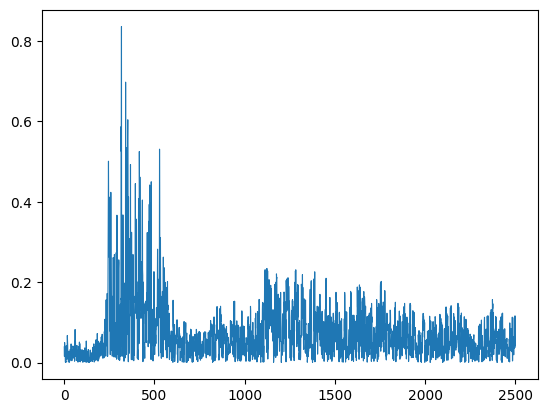

In [174]:
plt.plot(corr_graphs[max_corr_index], linewidth=0.8)
plt.show()

In [176]:
np_corr_graphs = np.array(corr_graphs)
np_r_abs_all_time_samples = np.array(r_abs_all_time_samples)

In [177]:
np.save('np_corr_graphs_1000i_401w_2500ts.npy', np_corr_graphs)
np.save('np_r_abs_all_time_samples_1000i_401w_2500ts.npy', np_r_abs_all_time_samples)